In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict
if "../" not in sys.path:
    sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [18]:
def make_epsilon_greedy_policy(Q, epsilon, nA):
    """
    Creates an epsilon-greedy policy based on a given Q-function and epsilon.
    
    Args:
        Q: A dictionary that maps from state -> action-values.
            Each value is a numpy array of length nA (see below)
        epsilon: The probability to select a random action . float between 0 and 1.
        nA: Number of actions in the environment.
    
    Returns:
        A function that takes the observation as an argument and returns
        the probabilities for each action in the form of a numpy array of length nA.
    
    """
    def policy_fn(observation):
        print(observation)
        A = np.ones(nA, dtype=float) * epsilon / nA
        best_action = np.argmax(Q[observation])
        A[best_action] += (1.0 - epsilon)
        return A
    return policy_fn

In [13]:
np.argmax(Q[1])

0

In [20]:
def mc_control_epsilon_greedy(env, num_episodes, discount_factor=1.0, epsilon=0.1):
    """
    Monte Carlo Control using Epsilon-Greedy policies.
    Finds an optimal epsilon-greedy policy.
    
    Args:
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
        epsilon: Chance the sample a random action. Float betwen 0 and 1.
    
    Returns:
        A tuple (Q, policy).
        Q is a dictionary mapping state -> action values.
        policy is a function that takes an observation as an argument and returns
        action probabilities
    """
    
    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final action-value function.
    # A nested dictionary that maps state -> (action -> action-value).
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    # The policy we're following
    policy = make_epsilon_greedy_policy(Q, epsilon, env.action_space.n)
    for i_episode in range(1, num_episodes + 1):
        # Print out which episode we're on, useful for debugging.
        if i_episode % 1000 == 0:
            print("\rEpisode {}/{}.".format(i_episode, num_episodes), end="")
            sys.stdout.flush()

        # Generate an episode.
        # An episode is an array of (state, action, reward) tuples
        episode = []
        state = env.reset()
        for t in range(100):
            probs = policy(state)
            action = np.random.choice(np.arange(len(probs)), p=probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state

        # Find all (state, action) pairs we've visited in this episode
        # We convert each state to a tuple so that we can use it as a dict key
        sa_in_episode = set([(tuple(x[0]), x[1]) for x in episode])
        for state, action in sa_in_episode:
            sa_pair = (state, action)
            # Find the first occurance of the (state, action) pair in the episode
            first_occurence_idx = next(i for i,x in enumerate(episode)
                                       if x[0] == state and x[1] == action)
            # Sum up all rewards since the first occurance
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])])
            # Calculate average return for this state over all sampled episodes
            returns_sum[sa_pair] += G
            returns_count[sa_pair] += 1.0
            Q[state][action] = returns_sum[sa_pair] / returns_count[sa_pair]
        
        # The policy is improved implicitly by changing the Q dictionary
    
    return Q, policy

In [21]:
Q, policy = mc_control_epsilon_greedy(env, num_episodes=500000, epsilon=0.1)

(12, 10, False)
(15, 1, False)
(15, 5, False)
(18, 10, False)
(12, 9, False)
(21, 10, True)
(20, 5, False)
(14, 5, False)
(17, 9, False)
(14, 8, False)
(20, 7, True)
(12, 3, False)
(17, 3, True)
(14, 8, False)
(16, 8, False)
(19, 5, True)
(19, 10, False)
(18, 2, False)
(14, 8, False)
(20, 5, False)
(15, 5, False)
(21, 4, True)
(19, 7, False)
(19, 7, False)
(17, 10, False)
(21, 10, True)
(15, 1, False)
(20, 9, False)
(20, 1, False)
(18, 10, False)
(13, 8, False)
(16, 2, False)
(14, 8, False)
(15, 7, False)
(19, 4, False)
(13, 1, False)
(15, 10, False)
(21, 5, True)
(20, 9, False)
(14, 8, False)
(13, 5, False)
(15, 10, False)
(19, 3, True)
(12, 10, False)
(15, 9, False)
(21, 10, True)
(21, 10, True)
(21, 1, True)
(14, 9, True)
(21, 10, False)
(16, 6, True)
(20, 1, False)
(20, 5, False)
(13, 6, False)
(20, 10, False)
(16, 2, False)
(19, 6, False)
(19, 1, False)
(20, 10, False)
(15, 8, False)
(20, 2, False)
(21, 10, True)
(13, 1, False)
(21, 10, True)
(15, 5, False)
(17, 5, False)
(12, 9, 

(12, 3, True)
(15, 8, False)
(14, 10, False)
(12, 7, False)
(18, 10, False)
(17, 5, False)
(21, 5, False)
(15, 4, False)
(12, 10, False)
(15, 10, False)
(13, 10, False)
(20, 5, False)
(16, 5, False)
(20, 5, False)
(13, 1, False)
(17, 10, False)
(17, 2, False)
(15, 5, False)
(20, 10, False)
(13, 8, False)
(18, 10, False)
(16, 10, False)
(12, 3, False)
(15, 10, False)
(18, 4, False)
(19, 10, False)
(17, 4, False)
(12, 6, False)
(20, 6, False)
(19, 9, False)
(15, 2, False)
(14, 4, False)
(20, 10, False)
(13, 9, False)
(12, 8, False)
(17, 8, False)
(17, 9, True)
(19, 9, True)
(21, 4, True)
(13, 9, False)
(21, 10, True)
(19, 10, False)
(12, 10, False)
(14, 2, False)
(20, 10, False)
(17, 4, False)
(12, 7, False)
(17, 10, True)
(16, 10, False)
(16, 4, False)
(14, 4, False)
(12, 10, False)
(19, 4, True)
(19, 6, True)
(17, 1, False)
(12, 4, False)
(14, 4, False)
(14, 4, False)
(13, 10, False)
(15, 1, False)
(12, 7, False)
(18, 3, False)
(14, 6, False)
(21, 2, True)
(20, 6, False)
(13, 2, True)


(13, 3, False)
(14, 3, True)
(16, 10, False)
(19, 1, False)
(20, 2, False)
(17, 10, False)
(16, 10, False)
(20, 10, False)
(16, 10, False)
(21, 10, False)
(15, 10, True)
(13, 8, False)
(15, 1, False)
(14, 10, False)
(13, 9, False)
(21, 9, False)
(13, 10, False)
(16, 10, False)
(13, 9, False)
(18, 10, False)
(15, 3, False)
(16, 10, False)
(20, 10, True)
(12, 6, False)
(17, 10, False)
(16, 2, False)
(13, 7, False)
(19, 7, False)
(17, 10, False)
(13, 6, True)
(14, 10, True)
(18, 8, False)
(19, 7, False)
(20, 10, False)
(13, 10, False)
(18, 10, False)
(15, 8, False)
(19, 10, False)
(14, 9, False)
(12, 9, False)
(21, 9, False)
(17, 4, False)
(21, 4, True)
(13, 10, False)
(14, 1, False)
(12, 6, False)
(16, 6, False)
(17, 6, False)
(17, 10, False)
(19, 3, False)
(14, 5, False)
(15, 7, False)
(12, 6, False)
(15, 6, False)
(18, 6, False)
(16, 10, False)
(21, 10, False)
(12, 3, False)
(21, 5, True)
(18, 10, False)
(20, 1, False)
(21, 10, False)
(12, 6, False)
(17, 6, False)
(20, 3, False)
(14, 6

(18, 2, False)
(17, 8, False)
(16, 10, False)
(20, 10, False)
(15, 4, False)
(17, 10, False)
(17, 5, False)
(17, 10, False)
(14, 8, False)
(13, 1, True)
(13, 5, False)
(20, 6, False)
(14, 10, False)
(18, 10, False)
(13, 5, False)
(18, 5, False)
(20, 10, False)
(12, 10, False)
(21, 10, False)
(13, 10, False)
(20, 10, False)
(15, 2, False)
(19, 2, False)
(18, 6, False)
(18, 7, True)
(19, 10, False)
(15, 3, False)
(13, 3, False)
(13, 6, False)
(18, 5, False)
(12, 10, False)
(14, 10, False)
(18, 6, False)
(15, 2, False)
(17, 2, False)
(16, 10, True)
(12, 10, False)
(12, 10, False)
(16, 10, False)
(13, 9, False)
(12, 5, False)
(18, 10, False)
(21, 10, True)
(15, 6, False)
(19, 5, False)
(13, 10, False)
(18, 10, False)
(16, 9, False)
(18, 9, False)
(14, 1, True)
(16, 5, False)
(15, 6, False)
(19, 10, False)
(13, 7, False)
(21, 10, True)
(21, 7, True)
(13, 1, False)
(19, 1, False)
(20, 10, False)
(15, 9, False)
(21, 10, True)
(17, 10, False)
(14, 1, False)
(16, 7, False)
(17, 9, False)
(15, 1

(12, 5, False)
(14, 7, False)
(16, 4, False)
(18, 4, False)
(12, 9, False)
(18, 9, False)
(21, 3, True)
(17, 10, True)
(12, 8, False)
(16, 10, False)
(18, 10, False)
(21, 10, False)
(14, 8, False)
(13, 10, False)
(19, 10, False)
(14, 4, False)
(19, 9, False)
(12, 4, False)
(18, 4, False)
(13, 10, False)
(15, 10, False)
(20, 3, False)
(19, 9, False)
(15, 10, False)
(17, 10, False)
(14, 3, False)
(21, 3, False)
(13, 6, True)
(13, 6, False)
(19, 6, False)
(18, 10, False)
(14, 10, False)
(19, 8, False)
(12, 7, False)
(13, 6, False)
(13, 3, False)
(18, 3, True)
(17, 9, False)
(15, 3, False)
(15, 6, True)
(16, 4, False)
(21, 4, True)
(13, 6, False)
(14, 10, False)
(12, 5, False)
(16, 10, False)
(19, 10, False)
(13, 2, False)
(18, 10, False)
(12, 1, True)
(12, 1, False)
(12, 1, False)
(17, 7, False)
(19, 7, False)
(19, 7, True)
(16, 10, False)
(21, 10, False)
(14, 10, True)
(16, 4, False)
(18, 10, False)
(12, 10, False)
(16, 10, False)
(16, 3, False)
(20, 1, False)
(15, 9, False)
(13, 1, Fals

Episode 4000/500000.(18, 10, False)
(20, 5, False)
(19, 8, False)
(12, 1, False)
(13, 10, True)
(21, 10, True)
(19, 3, True)
(18, 9, False)
(21, 10, True)
(21, 10, True)
(21, 10, False)
(21, 2, True)
(17, 2, False)
(14, 10, False)
(12, 5, False)
(21, 4, False)
(13, 9, False)
(14, 6, False)
(20, 1, False)
(21, 3, True)
(16, 7, True)
(14, 7, False)
(16, 7, False)
(21, 4, True)
(12, 4, False)
(20, 4, False)
(13, 7, False)
(20, 10, False)
(18, 10, False)
(18, 10, False)
(12, 4, False)
(15, 9, False)
(17, 10, False)
(21, 1, False)
(14, 10, False)
(13, 3, True)
(20, 5, False)
(13, 2, False)
(17, 6, True)
(13, 10, False)
(15, 10, False)
(16, 10, False)
(20, 3, False)
(12, 2, False)
(15, 9, False)
(15, 10, False)
(12, 8, True)
(12, 8, False)
(20, 8, False)
(14, 4, False)
(20, 6, False)
(17, 10, False)
(14, 10, False)
(20, 10, False)
(15, 2, False)
(19, 2, False)
(14, 5, False)
(15, 8, False)
(19, 3, False)
(20, 2, False)
(19, 10, True)
(20, 10, False)
(15, 10, True)
(19, 9, False)
(12, 9, Fals

(15, 4, False)
(16, 1, False)
(18, 10, False)
(19, 9, True)
(12, 5, False)
(20, 10, False)
(17, 4, True)
(16, 10, False)
(21, 10, False)
(13, 10, False)
(18, 10, False)
(17, 8, False)
(13, 10, False)
(19, 10, False)
(15, 3, False)
(17, 7, False)
(20, 7, False)
(13, 2, False)
(15, 8, False)
(12, 10, False)
(17, 10, False)
(15, 9, False)
(12, 5, False)
(19, 7, False)
(18, 10, False)
(16, 3, False)
(14, 10, False)
(17, 10, False)
(15, 7, False)
(19, 9, True)
(19, 2, False)
(20, 10, False)
(19, 6, False)
(14, 10, False)
(18, 2, False)
(18, 10, False)
(13, 1, False)
(16, 1, False)
(19, 1, False)
(19, 6, True)
(17, 6, False)
(13, 7, False)
(19, 3, False)
(20, 4, False)
(12, 6, False)
(15, 3, False)
(15, 7, False)
(20, 6, False)
(19, 1, False)
(20, 8, False)
(15, 10, False)
(16, 3, False)
(15, 3, False)
(17, 6, False)
(19, 10, False)
(20, 4, False)
(14, 10, False)
(18, 10, False)
(20, 7, False)
(12, 9, False)
(18, 9, False)
(19, 10, False)
(14, 6, False)
(17, 4, False)
(14, 9, False)
(12, 8, 

(18, 6, False)
(12, 10, False)
(18, 8, True)
(18, 6, False)
(17, 9, True)
(12, 9, False)
(16, 9, False)
(20, 4, False)
(14, 8, False)
(14, 5, False)
(18, 5, False)
(21, 5, False)
(19, 2, False)
(14, 7, False)
(18, 10, False)
(17, 6, True)
(17, 7, True)
(15, 10, False)
(21, 10, False)
(14, 2, False)
(21, 2, True)
(12, 6, False)
(21, 6, False)
(20, 10, False)
(18, 10, True)
(19, 7, True)
(16, 8, True)
(17, 9, False)
(20, 8, False)
(21, 4, True)
(19, 8, False)
(17, 10, False)
(16, 4, True)
(19, 4, True)
(12, 4, False)
(14, 4, False)
(18, 9, True)
(13, 9, False)
(15, 2, True)
(17, 7, False)
(16, 1, False)
(16, 10, False)
(17, 8, False)
(19, 10, True)
(16, 8, False)
(20, 8, False)
(14, 5, True)
(14, 5, False)
(15, 2, False)
(18, 2, False)
(12, 10, False)
(14, 10, False)
(16, 10, False)
(17, 1, False)
(19, 10, False)
(20, 10, False)
(21, 10, True)
(18, 10, False)
(13, 10, False)
(16, 6, True)
(16, 6, False)
(20, 10, False)
(12, 10, False)
(13, 9, False)
(12, 10, True)
(16, 10, True)
(16, 10,

(18, 10, False)
(15, 6, False)
(13, 2, False)
(14, 10, False)
(19, 10, False)
(17, 8, False)
(20, 10, False)
(21, 10, False)
(12, 5, False)
(20, 10, False)
(17, 8, False)
(18, 8, False)
(14, 2, False)
(15, 8, False)
(21, 8, False)
(20, 1, False)
(12, 6, False)
(21, 6, False)
(20, 7, False)
(14, 10, False)
(16, 7, True)
(18, 10, False)
(21, 7, True)
(12, 10, False)
(15, 10, False)
(19, 10, False)
(14, 5, False)
(13, 6, False)
(19, 6, False)
(12, 10, False)
(16, 10, False)
(20, 10, False)
(18, 6, True)
(19, 9, False)
(18, 1, False)
(20, 10, False)
(18, 10, True)
(12, 10, False)
(13, 10, False)
(18, 10, False)
(20, 1, False)
(16, 8, False)
(17, 10, True)
(12, 10, False)
(12, 10, False)
(15, 10, False)
(15, 9, False)
(13, 10, False)
(15, 10, False)
(19, 3, False)
(13, 3, True)
(13, 4, False)
(18, 4, False)
(12, 5, False)
(13, 2, False)
(13, 4, False)
(16, 4, False)
(12, 5, False)
(21, 5, False)
(19, 1, False)
(15, 4, False)
(20, 10, False)
(12, 2, False)
(19, 10, False)
(19, 10, False)
(17

(21, 7, True)
(20, 4, False)
(20, 7, False)
(15, 10, False)
(17, 10, False)
(20, 7, False)
(15, 4, False)
(17, 6, False)
(15, 8, False)
(21, 8, False)
(12, 10, False)
(15, 10, False)
(16, 2, False)
(19, 1, False)
(18, 8, False)
(16, 6, False)
(21, 10, False)
(12, 10, False)
(14, 9, False)
(16, 3, False)
(20, 2, False)
(18, 10, False)
(14, 1, True)
(17, 7, True)
(15, 9, False)
(14, 4, False)
(21, 10, True)
(14, 10, True)
(16, 1, False)
(19, 7, False)
(13, 9, True)
(20, 8, False)
(14, 10, False)
(12, 7, False)
(13, 4, False)
(15, 4, False)
(16, 3, False)
(17, 10, True)
(13, 10, False)
(15, 10, False)
(16, 10, False)
(18, 10, False)
(18, 3, False)
(13, 2, False)
(21, 10, True)
(16, 4, False)
(20, 10, False)
(15, 10, False)
(21, 10, False)
(13, 10, False)
(16, 10, False)
(15, 5, False)
(20, 10, False)
(14, 10, False)
(18, 10, False)
(16, 10, False)
(12, 3, False)
(21, 9, False)
(16, 10, False)
(18, 8, False)
(20, 4, False)
(13, 10, False)
(17, 10, False)
(14, 3, False)
(17, 3, False)
(17, 

(21, 10, False)
(17, 10, False)
(13, 10, False)
(14, 10, False)
(15, 9, False)
(15, 10, False)
(18, 8, False)
(13, 10, False)
(18, 10, False)
(18, 10, False)
(20, 10, False)
(12, 4, False)
(20, 4, False)
(19, 1, False)
(20, 8, False)
(20, 10, False)
(17, 8, False)
(21, 7, True)
(17, 4, False)
(12, 5, False)
(15, 6, False)
(19, 10, False)
(16, 9, False)
(13, 9, False)
(15, 1, False)
(20, 9, False)
(20, 10, False)
(12, 10, False)
(14, 10, False)
(19, 8, False)
(12, 7, True)
(21, 7, True)
(13, 10, False)
(12, 3, False)
(14, 10, False)
(14, 6, False)
(13, 10, False)
(18, 9, False)
(15, 10, False)
(20, 10, False)
(13, 10, False)
(15, 10, False)
(20, 10, False)
(12, 1, False)
(15, 10, False)
(18, 10, False)
(12, 9, False)
(18, 10, False)
(13, 10, False)
(17, 10, False)
(20, 5, False)
(15, 2, False)
(12, 10, False)
(21, 10, False)
(20, 10, False)
(12, 1, False)
(17, 10, False)
(20, 3, False)
(21, 4, True)
(12, 10, False)
(14, 10, False)
(18, 10, False)
(19, 7, False)
(21, 7, False)
(20, 10, F

Episode 7000/500000.(18, 9, False)
(20, 10, False)
(13, 6, False)
(13, 7, False)
(12, 3, False)
(18, 5, False)
(19, 8, False)
(14, 9, False)
(16, 8, False)
(17, 10, False)
(18, 10, False)
(18, 6, True)
(16, 8, True)
(14, 10, False)
(21, 4, False)
(17, 10, False)
(13, 10, False)
(18, 4, False)
(15, 3, False)
(17, 10, False)
(15, 10, False)
(18, 10, False)
(17, 10, False)
(20, 10, False)
(15, 10, False)
(18, 10, False)
(19, 3, False)
(17, 8, False)
(19, 10, True)
(13, 1, False)
(20, 1, False)
(17, 7, False)
(19, 5, True)
(19, 10, True)
(18, 7, True)
(15, 2, False)
(14, 5, False)
(18, 10, True)
(21, 7, False)
(15, 4, True)
(17, 4, True)
(17, 4, False)
(19, 5, False)
(20, 9, True)
(20, 10, False)
(14, 10, False)
(21, 10, False)
(19, 1, False)
(18, 8, False)
(19, 4, False)
(12, 2, False)
(15, 10, False)
(12, 4, False)
(14, 8, False)
(18, 8, False)
(21, 2, True)
(16, 10, False)
(13, 8, False)
(15, 10, False)
(17, 1, False)
(21, 1, False)
(19, 4, True)
(20, 10, False)
(13, 9, False)
(21, 2, T

(13, 5, True)
(13, 5, False)
(16, 1, False)
(16, 1, False)
(12, 10, False)
(17, 1, False)
(13, 10, False)
(16, 10, False)
(18, 10, False)
(12, 9, False)
(15, 9, False)
(17, 10, False)
(17, 3, False)
(21, 10, True)
(14, 10, True)
(19, 6, False)
(15, 10, False)
(21, 10, False)
(19, 6, False)
(18, 3, False)
(12, 3, False)
(20, 4, False)
(12, 2, False)
(14, 7, False)
(16, 1, False)
(18, 6, False)
(18, 9, False)
(15, 9, False)
(13, 8, False)
(21, 10, True)
(20, 7, False)
(16, 4, False)
(18, 4, False)
(17, 2, False)
(20, 4, False)
(19, 10, False)
(20, 9, False)
(14, 9, False)
(18, 9, False)
(13, 9, False)
(19, 8, True)
(18, 10, False)
(15, 3, False)
(19, 7, False)
(12, 8, False)
(18, 5, True)
(15, 10, False)
(14, 10, False)
(20, 1, False)
(19, 6, True)
(20, 8, False)
(12, 6, False)
(14, 6, False)
(20, 9, True)
(18, 6, False)
(17, 10, False)
(17, 10, False)
(14, 10, True)
(15, 1, False)
(21, 1, False)
(20, 3, False)
(17, 1, False)
(19, 4, False)
(12, 7, False)
(12, 2, False)
(21, 9, True)
(14

Episode 8000/500000.(17, 1, False)
(15, 4, False)
(15, 8, False)
(18, 10, False)
(13, 8, True)
(13, 8, False)
(16, 7, False)
(13, 10, False)
(17, 10, False)
(20, 10, False)
(12, 2, False)
(13, 4, False)
(17, 1, False)
(20, 8, False)
(17, 2, False)
(19, 1, True)
(16, 2, False)
(15, 7, False)
(19, 10, False)
(19, 7, False)
(16, 4, False)
(13, 9, False)
(19, 5, True)
(20, 10, False)
(16, 10, False)
(20, 10, False)
(14, 6, False)
(17, 1, False)
(17, 3, False)
(20, 6, False)
(15, 10, False)
(21, 10, False)
(15, 1, False)
(19, 7, False)
(14, 10, False)
(13, 6, False)
(19, 10, False)
(18, 10, False)
(15, 2, False)
(20, 6, False)
(20, 3, False)
(21, 9, True)
(12, 10, False)
(21, 10, False)
(15, 10, False)
(13, 4, False)
(12, 5, False)
(14, 3, False)
(13, 10, False)
(21, 10, False)
(21, 7, True)
(15, 9, False)
(18, 10, True)
(20, 6, False)
(12, 3, False)
(20, 1, True)
(20, 1, False)
(13, 10, True)
(13, 10, False)
(18, 10, False)
(14, 6, True)
(15, 6, True)
(17, 7, False)
(20, 5, False)
(13, 10,

(15, 10, False)
(19, 10, False)
(12, 8, False)
(15, 8, False)
(15, 3, False)
(14, 10, False)
(12, 9, False)
(19, 9, False)
(21, 6, False)
(20, 1, False)
(15, 1, False)
(18, 7, True)
(13, 8, False)
(20, 9, False)
(21, 2, True)
(14, 4, False)
(16, 3, True)
(18, 6, False)
(19, 9, False)
(19, 3, False)
(19, 5, False)
(15, 10, False)
(15, 10, False)
(13, 2, False)
(14, 4, False)
(17, 4, True)
(14, 4, False)
(12, 5, False)
(13, 10, False)
(16, 2, True)
(13, 2, False)
(16, 10, False)
(18, 6, False)
(15, 10, True)
(14, 8, False)
(18, 1, False)
(13, 10, False)
(16, 10, False)
(18, 10, False)
(21, 9, True)
(16, 6, False)
(15, 2, False)
(19, 2, False)
(18, 9, True)
(21, 9, True)
(15, 4, False)
(18, 7, False)
(13, 10, False)
(19, 10, False)
(14, 3, False)
(13, 2, False)
(15, 3, False)
(16, 3, False)
(12, 2, False)
(14, 5, True)
(21, 5, True)
(21, 8, True)
(18, 7, False)
(21, 8, True)
(13, 6, False)
(21, 7, False)
(16, 2, False)
(13, 8, False)
(16, 9, False)
(13, 10, False)
(21, 10, False)
(14, 9, 

Episode 9000/500000.(16, 7, False)
(21, 3, True)
(12, 8, True)
(12, 8, False)
(21, 8, False)
(21, 1, False)
(21, 10, True)
(18, 10, False)
(18, 10, False)
(13, 10, False)
(20, 2, False)
(13, 3, False)
(18, 3, False)
(13, 1, True)
(12, 9, False)
(16, 9, False)
(14, 1, False)
(17, 1, True)
(15, 10, True)
(17, 7, False)
(21, 7, False)
(20, 6, False)
(15, 10, False)
(16, 2, True)
(15, 2, False)
(21, 2, False)
(18, 1, False)
(15, 10, False)
(16, 10, False)
(12, 5, False)
(16, 4, False)
(16, 3, False)
(18, 3, False)
(21, 10, True)
(12, 5, False)
(20, 1, False)
(19, 9, True)
(14, 5, False)
(12, 10, False)
(18, 1, False)
(16, 10, False)
(20, 10, False)
(14, 1, False)
(17, 1, False)
(20, 10, False)
(20, 10, False)
(21, 10, True)
(12, 5, False)
(13, 10, True)
(13, 10, False)
(19, 10, False)
(20, 3, False)
(13, 6, False)
(16, 10, False)
(19, 10, False)
(17, 5, False)
(14, 9, False)
(20, 10, False)
(16, 1, False)
(20, 3, False)
(12, 3, False)
(13, 3, False)
(13, 3, False)
(12, 3, False)
(19, 10, F

(17, 10, False)
(18, 4, False)
(17, 8, False)
(14, 6, False)
(14, 10, False)
(15, 2, False)
(13, 5, False)
(14, 10, False)
(17, 10, False)
(20, 6, True)
(17, 10, True)
(21, 10, True)
(13, 5, False)
(17, 1, False)
(12, 8, False)
(19, 8, False)
(14, 4, True)
(19, 4, True)
(18, 2, False)
(19, 10, False)
(13, 10, False)
(15, 10, False)
(13, 10, False)
(18, 10, False)
(20, 10, False)
(13, 6, False)
(12, 9, False)
(19, 9, False)
(12, 9, False)
(19, 9, False)
(19, 1, False)
(17, 5, True)
(19, 5, True)
(18, 10, False)
(21, 4, True)
(16, 6, True)
(14, 6, False)
(18, 10, False)
(13, 5, False)
(16, 1, False)
(14, 2, True)
(16, 2, True)
(15, 2, False)
(14, 1, False)
(19, 6, False)
(12, 3, False)
(17, 3, False)
(17, 9, False)
(18, 4, True)
(18, 8, False)
(12, 10, False)
(16, 10, False)
(15, 10, False)
(20, 6, False)
(12, 6, False)
(20, 7, False)
(16, 10, False)
(21, 10, False)
(14, 4, False)
(20, 4, True)
(18, 7, False)
(13, 10, False)
(21, 6, False)
(13, 5, False)
(12, 7, True)
(12, 7, False)
(19,

(12, 6, False)
(18, 10, False)
(19, 3, False)
(18, 3, True)
(17, 10, True)
(17, 10, False)
(15, 5, False)
(12, 9, False)
(20, 9, False)
(13, 10, False)
(19, 3, False)
(20, 10, False)
(21, 10, False)
(13, 6, False)
(18, 9, False)
(14, 1, False)
(16, 6, False)
(14, 10, False)
(17, 10, False)
(12, 7, False)
(20, 3, False)
(12, 10, False)
(21, 10, True)
(18, 8, False)
(16, 4, False)
(12, 7, False)
(17, 7, False)
(19, 7, False)
(17, 7, False)
(17, 6, False)
(13, 10, False)
(21, 10, False)
(16, 10, True)
(15, 10, False)
(18, 10, False)
(14, 9, False)
(15, 9, False)
(18, 4, False)
(12, 1, False)
(17, 8, False)
(15, 10, False)
(20, 10, False)
(18, 10, False)
(13, 10, False)
(21, 10, False)
(19, 10, False)
(13, 3, False)
(20, 10, False)
(12, 10, False)
(14, 10, False)
(18, 10, False)
(12, 3, False)
(16, 3, False)
(21, 3, False)
(18, 7, True)
(17, 10, False)
Episode 10000/500000.(14, 10, False)
(19, 10, False)
(16, 8, False)
(13, 7, False)
(18, 7, False)
(19, 10, True)
(21, 7, True)
(20, 7, True

(19, 10, False)
(16, 10, False)
(20, 5, False)
(18, 10, False)
(20, 8, False)
(14, 3, False)
(15, 8, False)
(20, 5, False)
(12, 5, False)
(12, 10, False)
(18, 10, False)
(17, 2, False)
(15, 9, False)
(14, 6, False)
(13, 6, False)
(19, 10, False)
(17, 2, False)
(20, 9, False)
(17, 7, False)
(18, 7, False)
(14, 1, False)
(12, 10, True)
(13, 10, True)
(20, 10, True)
(18, 6, False)
(20, 1, True)
(20, 1, False)
(20, 4, False)
(13, 10, False)
(18, 9, False)
(15, 10, False)
(15, 6, False)
(21, 10, True)
(20, 10, False)
(18, 6, False)
(13, 1, False)
(19, 3, False)
(15, 10, False)
(15, 5, False)
(19, 2, True)
(14, 9, False)
(17, 10, False)
(16, 1, False)
(18, 5, False)
(13, 10, True)
(21, 10, True)
(12, 6, False)
(13, 6, False)
(13, 7, True)
(13, 7, False)
(19, 5, True)
(12, 7, False)
(17, 7, False)
(18, 7, False)
(13, 9, False)
(18, 1, False)
(13, 6, False)
(14, 1, False)
(21, 1, False)
(17, 3, False)
(13, 10, False)
(20, 10, False)
(16, 10, False)
(21, 10, False)
(19, 10, False)
(14, 10, Fals

(17, 1, False)
Episode 11000/500000.(17, 10, False)
(12, 10, False)
(13, 10, False)
(19, 10, False)
(13, 2, False)
(14, 2, False)
(13, 9, False)
(12, 6, False)
(19, 6, False)
(19, 3, False)
(20, 9, False)
(16, 10, False)
(17, 10, False)
(12, 5, False)
(20, 4, False)
(17, 8, False)
(15, 10, False)
(18, 9, False)
(13, 10, False)
(15, 10, False)
(16, 4, False)
(12, 4, False)
(17, 4, False)
(19, 10, False)
(17, 10, False)
(21, 7, True)
(14, 6, False)
(12, 1, False)
(18, 10, True)
(15, 7, False)
(17, 8, False)
(13, 10, False)
(21, 10, False)
(21, 10, True)
(19, 2, True)
(17, 10, False)
(16, 6, False)
(12, 8, False)
(14, 8, False)
(15, 5, False)
(18, 10, False)
(13, 9, False)
(15, 8, False)
(17, 4, False)
(21, 10, False)
(15, 6, True)
(12, 3, False)
(13, 10, False)
(19, 10, False)
(20, 5, True)
(18, 5, False)
(15, 10, False)
(20, 10, False)
(21, 10, True)
(20, 1, False)
(17, 10, False)
(14, 4, False)
(20, 4, False)
(19, 2, False)
(15, 8, False)
(17, 8, False)
(15, 7, False)
(20, 2, False)
(1

(20, 10, False)
(21, 10, False)
(15, 6, False)
(12, 10, False)
(16, 10, False)
(13, 5, False)
(19, 10, False)
(16, 10, False)
(18, 10, True)
(15, 6, False)
(17, 6, False)
(19, 10, False)
(14, 2, False)
(14, 4, False)
(16, 9, False)
(14, 1, True)
(17, 10, False)
(12, 6, False)
(15, 6, False)
(13, 6, False)
(21, 6, False)
(13, 2, False)
(12, 9, False)
(13, 9, False)
(13, 1, False)
(21, 1, False)
(17, 6, False)
(17, 10, False)
(21, 1, True)
(16, 1, False)
(20, 10, False)
(13, 5, False)
(18, 10, False)
(15, 6, False)
(13, 9, False)
(14, 4, False)
(17, 10, False)
(12, 9, False)
(14, 9, False)
(20, 1, False)
(12, 2, False)
(21, 6, True)
(16, 1, True)
(19, 1, True)
(18, 6, False)
(17, 10, False)
(13, 2, False)
(13, 9, False)
(19, 10, True)
(14, 4, False)
(21, 10, True)
(14, 10, False)
(14, 10, False)
(14, 10, False)
(13, 5, True)
(17, 5, True)
(16, 5, False)
(20, 2, False)
(18, 7, False)
(12, 10, False)
(12, 1, False)
(16, 3, False)
(21, 10, True)
(17, 2, False)
(19, 5, False)
(21, 2, False)


Episode 12000/500000.(16, 9, True)
(20, 4, False)
(16, 10, False)
(20, 10, False)
(16, 7, True)
(13, 2, False)
(20, 10, False)
(14, 4, False)
(14, 7, False)
(21, 9, True)
(13, 7, False)
(15, 7, False)
(14, 4, False)
(13, 10, False)
(15, 10, False)
(16, 3, False)
(15, 1, False)
(17, 9, False)
(14, 1, False)
(12, 2, False)
(14, 2, False)
(19, 10, False)
(12, 1, False)
(13, 1, False)
(15, 1, False)
(14, 3, False)
(20, 7, False)
(13, 10, False)
(16, 10, False)
(12, 6, False)
(21, 6, False)
(20, 8, False)
(15, 10, False)
(20, 10, False)
(18, 5, True)
(17, 9, False)
(12, 1, False)
(13, 5, True)
(19, 5, True)
(18, 7, False)
(18, 7, False)
(20, 10, False)
(15, 10, False)
(20, 10, False)
(18, 10, True)
(20, 7, False)
(17, 7, False)
(13, 10, False)
(20, 10, False)
(12, 6, False)
(13, 8, False)
(17, 4, True)
(12, 4, False)
(12, 10, False)
(14, 10, False)
(15, 10, False)
(18, 10, False)
(12, 3, False)
(18, 4, False)
(17, 9, True)
(18, 9, True)
(13, 9, False)
(17, 10, False)
(14, 2, False)
(13, 10,

(15, 10, False)
(19, 10, False)
(15, 3, False)
(21, 6, True)
(19, 3, False)
(18, 4, False)
(12, 3, False)
(20, 8, False)
(17, 10, False)
(20, 10, False)
(20, 5, False)
(17, 8, True)
(19, 8, False)
(12, 3, False)
(19, 8, False)
(18, 10, False)
(14, 10, False)
(21, 10, False)
(20, 1, False)
(12, 3, False)
(19, 10, False)
(16, 6, False)
(12, 6, False)
(14, 6, False)
(13, 10, False)
(14, 10, False)
(19, 9, False)
(14, 10, False)
(21, 10, False)
(17, 4, False)
(15, 4, False)
(13, 2, False)
(18, 10, False)
(15, 10, False)
(20, 10, False)
(19, 6, False)
(15, 2, False)
(14, 10, False)
(16, 10, False)
(19, 10, False)
(12, 8, False)
(13, 2, False)
(16, 2, False)
(17, 3, False)
(18, 2, False)
(20, 2, False)
(16, 6, False)
(21, 10, True)
(21, 10, True)
(13, 1, False)
(17, 1, False)
(20, 8, False)
(14, 2, False)
(21, 10, True)
(19, 9, False)
(20, 10, False)
(14, 9, True)
(21, 1, True)
(14, 10, False)
(19, 10, True)
(15, 9, False)
(14, 1, False)
(14, 10, False)
(21, 10, False)
(19, 10, False)
(19, 1

(13, 10, False)
(18, 4, False)
(17, 4, False)
(14, 6, False)
(12, 2, False)
(18, 4, True)
(18, 8, False)
(14, 10, True)
(16, 10, False)
(16, 6, False)
(21, 10, True)
(18, 10, False)
(16, 3, False)
(20, 10, False)
(13, 7, False)
(14, 10, False)
(16, 5, True)
(17, 5, False)
(15, 6, True)
(20, 2, False)
(19, 10, False)
(19, 10, False)
(21, 7, True)
(14, 9, False)
(19, 9, False)
(12, 10, False)
(21, 10, False)
(21, 5, True)
(13, 8, False)
(20, 3, False)
(15, 10, False)
Episode 13000/500000.(15, 1, True)
(17, 10, False)
(14, 2, False)
(17, 8, False)
(16, 8, True)
(20, 7, False)
(19, 10, False)
(14, 8, False)
(17, 8, False)
(17, 10, True)
(20, 8, False)
(15, 3, False)
(15, 9, False)
(18, 5, False)
(12, 6, False)
(19, 6, False)
(18, 3, False)
(12, 6, False)
(21, 9, True)
(21, 10, True)
(21, 1, True)
(13, 9, False)
(12, 2, False)
(12, 3, False)
(12, 10, False)
(14, 10, False)
(18, 8, False)
(14, 10, False)
(21, 10, False)
(18, 2, False)
(16, 9, False)
(17, 1, True)
(16, 1, False)
(21, 4, True)

(17, 10, False)
(19, 5, False)
(14, 10, False)
(17, 10, False)
(14, 3, True)
(20, 6, True)
(12, 3, False)
(20, 9, False)
(12, 2, False)
(20, 6, False)
(14, 8, False)
(19, 10, False)
(13, 1, True)
(20, 5, True)
(12, 5, False)
(12, 6, False)
(19, 10, False)
(16, 2, False)
(18, 4, False)
(18, 10, False)
(13, 2, False)
(21, 2, True)
(20, 4, False)
(20, 10, False)
(20, 10, False)
(12, 1, False)
(15, 1, False)
(13, 1, False)
(16, 1, False)
(13, 10, False)
(13, 8, False)
(17, 1, True)
(20, 10, False)
(13, 2, False)
(20, 5, False)
(14, 10, False)
(15, 10, False)
(17, 10, False)
(20, 6, False)
(19, 3, False)
(20, 3, False)
(18, 10, False)
(20, 10, False)
(16, 10, False)
(19, 5, True)
(17, 10, False)
(12, 10, False)
(13, 10, False)
(19, 10, False)
(12, 4, False)
(16, 4, False)
(20, 2, False)
(21, 4, True)
(17, 7, False)
(20, 7, False)
(14, 4, False)
(16, 3, True)
(20, 2, False)
(18, 6, False)
(18, 8, False)
(13, 7, False)
(15, 7, False)
(15, 4, False)
(21, 8, False)
(20, 9, False)
(21, 10, True)

(20, 1, False)
(12, 10, False)
(19, 10, False)
(18, 2, False)
(16, 10, False)
(18, 10, False)
(20, 10, False)
(17, 3, False)
(13, 3, False)
(20, 5, True)
(21, 10, True)
(12, 2, False)
(15, 4, True)
(15, 4, False)
(16, 1, True)
(16, 1, False)
(21, 9, False)
(18, 9, False)
(18, 2, True)
(13, 2, False)
(19, 4, False)
(16, 10, False)
(21, 10, False)
(15, 10, False)
(15, 10, False)
(18, 10, False)
(21, 10, True)
(14, 6, False)
(21, 10, True)
(15, 10, False)
(19, 10, False)
(14, 2, False)
(21, 2, False)
(20, 6, False)
(16, 3, False)
(13, 10, False)
(18, 10, False)
(15, 6, False)
(17, 10, False)
(14, 5, False)
(18, 10, False)
(13, 10, True)
(13, 10, False)
(17, 3, False)
(12, 6, False)
(19, 6, False)
(18, 5, False)
(20, 7, False)
(21, 9, True)
(20, 6, True)
(12, 1, False)
(20, 1, False)
(13, 5, True)
(19, 5, True)
(20, 10, False)
(12, 1, False)
(20, 1, False)
(20, 4, False)
(12, 5, False)
(16, 1, False)
(17, 10, False)
(14, 8, False)
(20, 5, False)
(21, 7, True)
(17, 7, False)
(18, 7, False)


(18, 10, False)
(18, 7, False)
(21, 8, True)
(16, 7, False)
(14, 4, False)
(12, 10, False)
(14, 10, False)
(16, 10, False)
(17, 10, False)
(17, 10, True)
(16, 10, False)
(12, 10, True)
(13, 10, True)
(13, 10, False)
(15, 10, False)
(14, 1, False)
(19, 1, False)
(13, 10, False)
(20, 10, False)
(20, 8, False)
(17, 8, False)
(12, 10, False)
(19, 10, False)
(21, 10, False)
(20, 8, False)
(17, 6, False)
(13, 2, False)
(17, 2, False)
(18, 10, False)
(12, 4, False)
(19, 4, False)
(15, 10, False)
(14, 10, False)
(12, 9, False)
(20, 9, False)
(14, 4, False)
(17, 2, False)
(18, 10, False)
(15, 10, True)
(13, 1, False)
(20, 1, False)
(20, 8, False)
(13, 10, False)
(21, 8, False)
(19, 6, False)
(20, 3, True)
(14, 4, False)
(16, 10, False)
(18, 10, False)
(19, 5, False)
(20, 2, False)
(19, 10, True)
(14, 6, False)
(17, 9, False)
(15, 10, False)
(13, 7, False)
(19, 7, False)
(13, 7, False)
(15, 7, False)
(20, 6, False)
(18, 6, False)
(15, 10, False)
(19, 10, False)
(12, 10, False)
(18, 10, False)
(1

(18, 2, False)
(18, 6, False)
(21, 4, True)
(21, 9, False)
(15, 5, False)
(21, 5, True)
(18, 10, True)
(17, 10, False)
(15, 10, False)
(19, 3, True)
(14, 1, False)
(20, 1, False)
(15, 10, False)
(21, 10, False)
(18, 1, True)
(16, 1, False)
(19, 8, False)
(17, 6, False)
(16, 8, True)
(21, 9, True)
(14, 8, False)
(17, 8, False)
(21, 7, True)
(16, 8, False)
(12, 8, False)
(15, 8, False)
(12, 10, False)
(17, 9, False)
(13, 4, False)
(21, 1, True)
(12, 7, False)
(16, 7, False)
(19, 7, False)
(20, 10, False)
(20, 9, False)
(20, 1, False)
(20, 8, False)
(12, 7, False)
(17, 7, False)
(13, 4, True)
(16, 8, False)
(20, 10, False)
(12, 4, False)
(16, 4, False)
(21, 10, True)
(17, 1, True)
(13, 3, False)
(14, 3, True)
(19, 2, False)
(15, 4, False)
(16, 4, False)
(12, 7, False)
(14, 4, False)
(17, 3, False)
(21, 3, True)
(12, 4, False)
(13, 10, True)
(15, 10, True)
(12, 10, True)
(20, 10, True)
(20, 3, True)
(13, 3, True)
(20, 10, False)
(18, 9, False)
(17, 10, False)
(12, 10, True)
(20, 10, True)


(16, 2, True)
(12, 2, False)
(17, 10, False)
(20, 10, False)
(17, 6, False)
(16, 3, False)
(18, 10, False)
(16, 6, False)
(13, 10, True)
(18, 10, True)
(14, 5, False)
(20, 5, False)
(13, 4, False)
(15, 10, False)
(18, 10, False)
(17, 2, False)
(16, 8, False)
(14, 1, False)
(20, 10, False)
(15, 2, False)
(16, 2, False)
(19, 6, False)
(20, 2, False)
(17, 10, False)
(21, 7, False)
(14, 10, False)
(21, 10, False)
(19, 3, False)
(15, 5, False)
(12, 9, False)
(19, 9, False)
(14, 10, False)
(16, 5, True)
(17, 2, False)
(12, 4, False)
(21, 4, False)
(12, 10, False)
(16, 10, False)
(18, 10, False)
(12, 2, False)
(12, 8, False)
(16, 10, False)
(20, 10, False)
(16, 3, False)
(12, 10, False)
(17, 9, False)
(18, 10, False)
(19, 10, True)
(14, 1, False)
(14, 1, False)
(18, 1, False)
(18, 7, False)
(18, 10, False)
(19, 2, True)
(13, 10, False)
(18, 10, False)
(12, 4, False)
(14, 4, False)
(20, 5, False)
(16, 1, False)
(13, 6, False)
(16, 2, True)
(12, 2, False)
(20, 1, False)
(13, 7, False)
(18, 7, F

(13, 4, False)
(12, 6, False)
(12, 5, False)
(15, 10, False)
(21, 10, False)
(12, 10, False)
(14, 10, False)
(17, 10, False)
(16, 7, False)
(19, 2, False)
(12, 9, False)
(13, 6, False)
(19, 6, False)
(20, 8, False)
(20, 8, True)
(12, 8, False)
(16, 7, False)
(17, 7, False)
(21, 4, True)
(12, 10, False)
(13, 10, False)
(20, 10, False)
(19, 6, False)
(14, 2, False)
(12, 10, True)
(12, 10, False)
(18, 10, False)
(14, 8, False)
(18, 10, False)
(13, 5, False)
(20, 2, False)
(14, 1, False)
(16, 1, True)
(16, 1, False)
(12, 8, False)
(14, 8, True)
(14, 8, False)
(18, 8, True)
(15, 8, False)
(15, 8, True)
(20, 6, False)
(18, 10, False)
(12, 4, False)
(15, 10, False)
(17, 7, False)
(14, 2, False)
(16, 9, False)
(18, 10, False)
(17, 10, False)
(16, 6, False)
(17, 10, False)
(12, 2, False)
(21, 6, True)
(21, 8, True)
(14, 10, False)
(20, 10, False)
(17, 10, False)
(14, 3, False)
(13, 9, False)
(16, 9, False)
(14, 5, False)
(19, 3, True)
(17, 5, False)
(20, 8, False)
(21, 9, True)
(18, 3, False)
(

(12, 10, False)
(13, 10, False)
(19, 10, False)
(17, 10, False)
(19, 8, False)
(20, 9, False)
(16, 10, False)
(17, 10, False)
(21, 8, False)
(15, 6, False)
(14, 4, False)
(16, 10, False)
(20, 10, False)
(18, 4, False)
(20, 3, False)
(14, 10, False)
(18, 1, False)
(14, 8, False)
(16, 7, False)
(19, 3, True)
(15, 10, False)
(18, 10, False)
(14, 10, False)
(18, 10, False)
(20, 10, False)
(20, 9, False)
(18, 8, True)
(12, 8, False)
(18, 8, False)
(15, 6, False)
(13, 4, False)
(14, 4, False)
(17, 4, False)
(15, 2, False)
(21, 10, True)
(21, 9, False)
(15, 4, False)
(20, 10, False)
(12, 10, False)
(14, 10, False)
(13, 6, False)
(20, 6, False)
(16, 8, False)
(21, 8, False)
(19, 3, False)
(14, 5, False)
(13, 10, False)
(14, 10, False)
(13, 10, False)
(12, 3, False)
(17, 5, False)
(14, 8, False)
(12, 10, False)
(14, 10, False)
(15, 10, False)
(17, 10, False)
(13, 10, False)
(12, 3, False)
(17, 10, True)
(21, 10, True)
(12, 1, False)
(17, 1, False)
(21, 1, False)
(21, 10, False)
(13, 9, False)
(

(16, 8, True)
(13, 8, False)
(13, 9, False)
(18, 9, False)
(14, 9, False)
(12, 6, False)
(15, 7, False)
(12, 10, False)
(18, 10, False)
(20, 5, False)
(14, 5, True)
(13, 5, False)
(13, 10, False)
(16, 10, False)
(21, 10, False)
(12, 4, False)
(20, 4, False)
(21, 10, True)
(17, 8, False)
(13, 10, False)
(14, 10, False)
(18, 2, False)
(21, 6, False)
(13, 5, False)
(12, 1, False)
(15, 1, False)
(19, 10, False)
(16, 10, False)
(13, 1, False)
(13, 10, False)
(20, 10, False)
(15, 10, False)
(18, 3, False)
(12, 9, False)
(20, 10, False)
(15, 10, False)
(13, 8, False)
(20, 10, False)
(12, 1, False)
(19, 1, False)
(20, 10, False)
(14, 10, False)
(13, 10, False)
(16, 7, False)
(17, 7, False)
(21, 7, False)
(20, 5, True)
(12, 10, False)
(19, 10, False)
(14, 4, False)
(15, 2, False)
(16, 6, False)
(15, 5, False)
(20, 10, False)
(13, 10, False)
(20, 10, False)
(12, 10, False)
(18, 3, True)
(18, 3, False)
(19, 10, False)
(16, 10, False)
(19, 10, False)
(15, 3, False)
(15, 10, False)
(18, 6, False)
(

(16, 3, False)
(20, 1, False)
(14, 10, False)
(19, 10, False)
(14, 10, False)
(20, 10, False)
(13, 9, False)
(15, 6, True)
(20, 2, False)
(12, 10, False)
(20, 5, False)
(15, 2, False)
(20, 10, False)
(19, 7, True)
(16, 3, False)
(12, 10, False)
(21, 10, False)
(15, 4, False)
(20, 10, False)
(15, 1, False)
(20, 1, False)
(20, 1, True)
(18, 1, False)
(14, 5, True)
(14, 5, False)
(14, 6, False)
(13, 10, False)
(15, 9, False)
(14, 7, False)
(17, 4, False)
(12, 1, False)
(19, 1, False)
(14, 2, False)
(20, 3, False)
(17, 10, False)
(17, 4, True)
(20, 4, True)
(21, 10, True)
(17, 10, False)
(19, 10, False)
(17, 10, False)
(18, 9, False)
(17, 4, False)
(13, 10, False)
(16, 10, True)
(20, 10, True)
(17, 1, False)
(20, 1, False)
(19, 10, False)
(13, 10, False)
(20, 10, True)
(15, 8, False)
(12, 10, False)
(21, 10, False)
(19, 9, False)
(19, 5, True)
(14, 10, False)
(18, 10, False)
(21, 10, True)
(16, 10, False)
(21, 10, False)
(19, 3, False)
(20, 7, False)
(18, 2, False)
(14, 3, False)
(19, 8, F

(17, 4, False)
(12, 9, False)
(12, 5, False)
(12, 6, False)
(14, 5, False)
(18, 1, False)
(18, 2, False)
(20, 6, False)
(20, 1, False)
(18, 4, False)
(12, 4, False)
(19, 4, False)
(13, 1, False)
(12, 8, False)
(17, 8, False)
(12, 10, False)
(14, 10, False)
(18, 10, False)
(13, 8, False)
(14, 1, False)
(17, 1, False)
(19, 10, False)
(20, 9, False)
(15, 2, False)
(15, 8, False)
(21, 8, False)
(15, 8, False)
(13, 10, False)
(12, 10, False)
(21, 10, False)
(18, 8, False)
(18, 3, False)
(21, 1, True)
(21, 1, True)
(20, 1, False)
(16, 10, False)
(19, 8, False)
(20, 2, False)
(19, 9, False)
(14, 2, False)
(14, 7, False)
(16, 6, True)
(16, 6, False)
(12, 9, False)
(20, 9, False)
(18, 3, False)
(17, 10, False)
(20, 1, False)
(17, 9, False)
(18, 4, False)
(13, 2, False)
(15, 7, False)
(18, 7, False)
(14, 1, False)
(20, 1, False)
(15, 6, False)
(20, 10, False)
(16, 10, False)
(14, 5, False)
(20, 7, True)
(12, 10, False)
(20, 10, False)
(17, 10, True)
(17, 10, False)
(21, 10, True)
(15, 10, False)

(21, 5, False)
(20, 10, False)
(13, 3, False)
(19, 3, False)
(14, 5, False)
(12, 7, False)
(20, 10, False)
(14, 10, False)
(16, 10, False)
(13, 10, False)
(16, 10, False)
(21, 10, False)
(17, 6, True)
(18, 9, False)
(17, 3, False)
(13, 10, False)
(14, 10, False)
(18, 10, False)
(19, 10, False)
(16, 8, False)
(20, 8, False)
(21, 2, False)
(18, 2, True)
(20, 2, True)
(20, 10, True)
(19, 10, False)
(12, 3, False)
(15, 3, False)
(16, 3, False)
(20, 6, True)
(20, 1, False)
(12, 3, False)
(21, 7, True)
(18, 1, False)
(12, 4, False)
(15, 6, False)
(15, 3, True)
(12, 10, False)
(14, 3, False)
(12, 8, False)
(15, 8, False)
(12, 10, False)
(14, 10, False)
(18, 6, False)
(17, 3, False)
(17, 3, False)
(12, 2, False)
(21, 5, False)
(12, 9, False)
(12, 3, False)
(12, 2, False)
(14, 2, False)
(17, 10, False)
(12, 2, False)
(14, 2, False)
(15, 2, False)
(13, 10, False)
(19, 10, False)
(14, 8, False)
(13, 10, False)
(17, 5, True)
(19, 2, False)
(19, 5, True)
(18, 8, False)
(12, 2, False)
(14, 10, False

KeyboardInterrupt: 

In [9]:
Q[12]

array([0., 0.])

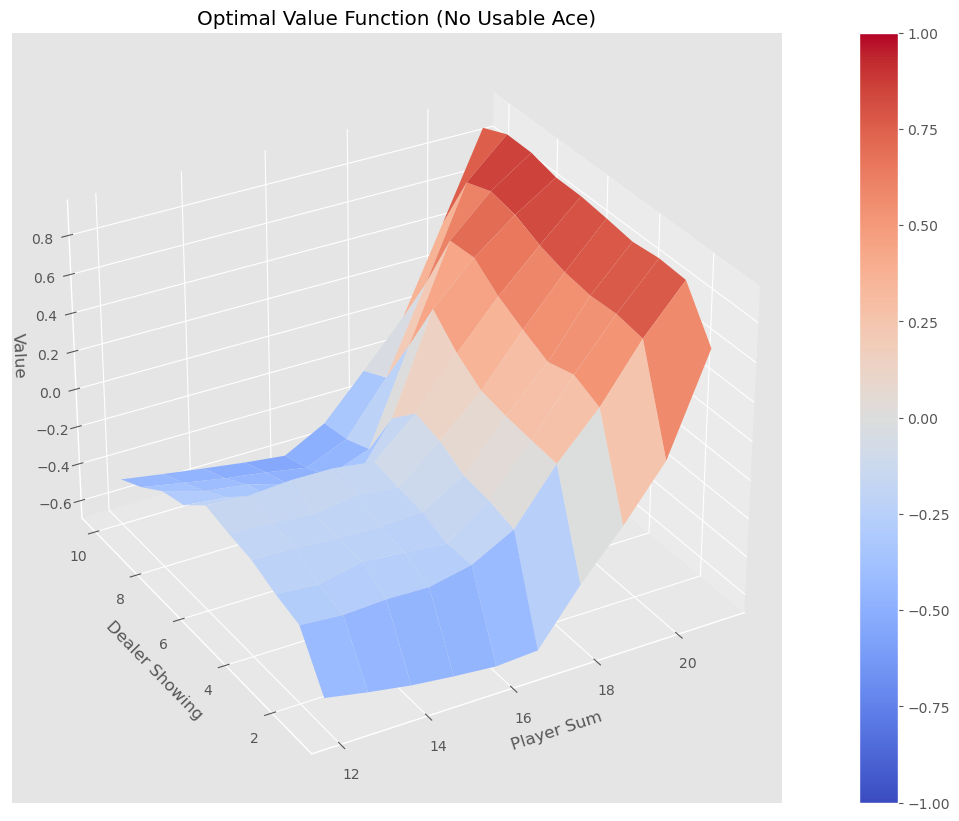

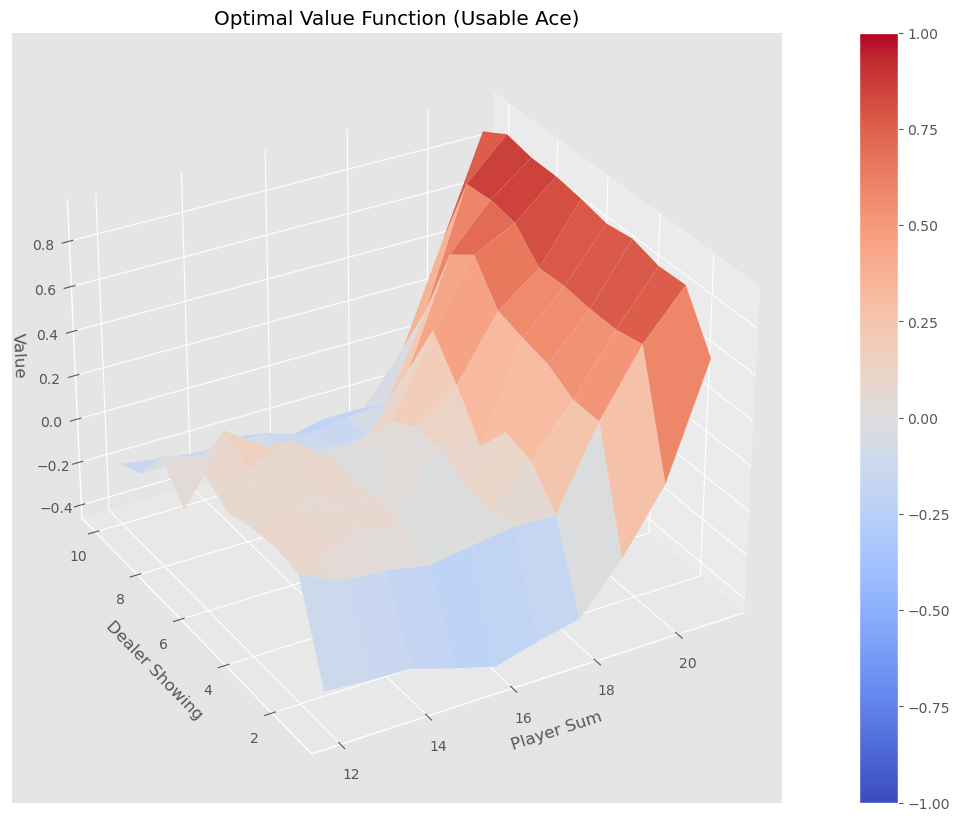

In [7]:
# For plotting: Create value function from action-value function
# by picking the best action at each state
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")